# Week 7 - Notes: Critical Points; Phase Space; Trajectories

Thus far, we have developed an approach to solving differential equations for particular trajectories of the different classical systems that we have studied. Typically, we work to develop the equations of motion for a system using Newton's Second Law. Those equations typically have the form

$$\ddot{\vec{x}} = f(\vec{x}, \dot{\vec{x}}, t),$$

where $\vec{x}$ is the position vector of the system, $\dot{\vec{x}}$ is the velocity vector of the system, and $f$ is some function that depends on the position, velocity, and time. In 1D, we have studied a number of systems where the equations of motion takes the form:

$$\ddot{x} = f(x, \dot{x}, t).$$

Our approach has been to find ways of solving these equations for a given set of initial conditions ($x_0$, $v_0$, at $t=t_0$) to get individual trajectories of the system.

$$x(t)\; \text{and}\; v(t)\; \text{for}\; t \geq t_0.$$

## Developing a General Understanding of Motion

However, some of the equations of motion we have developed (in fact, most) cannot be solved in a "closed form", which is what gives rise to analytical trajectories. In these cases, we have used numerical methods to solve the equations of motion.

It also seems pretty inefficient to have to solve the equations of motion for every possible set of initial conditions. It would be nice if we could develop a general understanding of the behavior of the system without having to solve the equations of motion for every possible set of initial conditions.

Finally, we often care less about particular trajectories and more about the general behavior of the system. For example, we might want to know if the system is stable, or if it will oscillate, or if it will spiral in or out. We seek to understand qualitatively different solutions to the equations of motion.

In this week, we will take a step back and consider the general structure of the solutions to these equations. We will introduce the concept of a critical point, and we will discuss how the phase space of a system can be used to understand the behavior of the system.  This approach will help us broaden our understanding of the solutions to differential equations and the behavior of classical systems. It also gives us a new set of tools and ways of thinking about the systems that we have been studying.

## Example: A Nonlinear 1st Order ODE

Consider the following first-order ordinary differential equation:

$$\dot{x} = \sin x.$$

Let's assume we want to find $x(t)$ for a given set of initial conditions $x_0$ at $t=t_0$. This equation is nonlinear, but we can make some progress by separating variables:

$$\frac{dx}{\sin x} = dt.$$

We can integrate both sides to get:

$$\int \frac{dx}{\sin x} = \int dt.$$

The integral on the left-hand side is one that we can look up:

$$\int \frac{dx}{\sin x} = \ln\left|\csc\left(x\right) + \cot\left(x\right)\right| + C.$$

Cool. So we have:

$$t-t_0 = \ln\left|\csc\left(x\right) + \cot\left(x\right)\right| - \ln\left|\csc\left(x_0\right) + \cot\left(x_0\right)\right|,$$

$$t-t_0 = \ln\left|\frac{\csc\left(x\right) + \cot\left(x\right)}{\csc\left(x_0\right) + \cot\left(x_0\right)}\right|.$$

Well how do solve for $x(t)$? That's not so easy. And a harder question is: what does the motion look like?

We need a new approach.

### A Geometric Analysis

Let us instead plot the equation $\dot{x} = \sin x$ in the [phase space](https://en.wikipedia.org/wiki/Phase_space) of the system. Here, we are plotting the velocity of the system as a function of the position of the system. This is a common approach to understanding the behavior of a system.

In 1D, this plot is called a 'Flow on a Line'. That is because we can characterize the behavior of the system by the direction of the flow of the system in the phase space. In this case, the flow is given by the function $\sin x$. A positive $\sin x$ means that the system is moving to the right, and a negative $\sin x$ means that the system is moving to the left. We plot it below with some additional information.

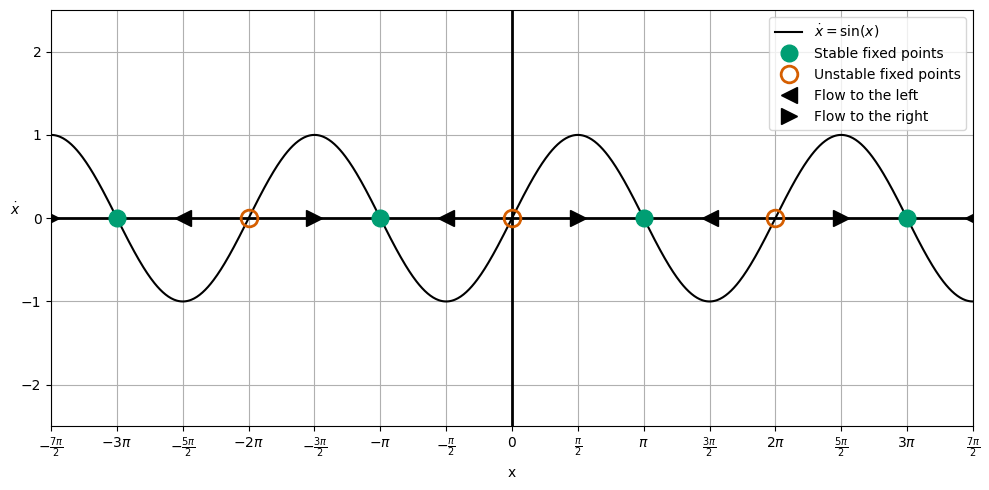

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

x = np.linspace(-7/2*np.pi, 7/2*np.pi, 1000)
xdot = np.sin(x)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, xdot, 'k', label=r'$\dot{x} = \sin(x)$')

ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

plt.plot([-3*np.pi, -np.pi, np.pi, 3*np.pi], [0, 0, 0, 0], 
         'C1o', 
         markersize=12,
         label='Stable fixed points')

plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0,  0], 
         'C2o', 
         markersize=12, 
         markerfacecolor='none',
         markeredgewidth=2,
         markeredgecolor='C2',
         label='Unstable fixed points')

plt.plot([-5/2*np.pi, -np.pi/2, 3*np.pi/2, 7/2*np.pi], [0, 0, 0, 0], 
         'k<', 
         markersize=12,
         label='Flow to the left')
plt.plot([-7/2*np.pi, -3/2*np.pi, np.pi/2, 5/2*np.pi], [0, 0, 0, 0], 
         'k>', 
         markersize=12,
         label='Flow to the right')

plt.legend(loc='upper right')

ax.set_xlabel(r'x')
ax.set_ylabel(r'$\dot{x}$', rotation=0)
ax.grid()
xticks = [-4*np.pi, -7*np.pi/2, -3*np.pi, -5*np.pi/2, -2*np.pi, -3*np.pi/2, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi, 5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi]
xticks_labels = [r'$-4\pi$', r'$-\frac{7\pi}{2}$', r'$-3\pi$', r'$-\frac{5\pi}{2}$', r'$-2\pi$', r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$', r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels)
plt.xlim(-7/2*np.pi, 7/2*np.pi)
plt.ylim(-2.5, 2.5)
plt.tight_layout()

The plot we have made is called a 'Phase Portrait'. It is a plot of the velocity of the system as a function of the position of the system. The arrows indicate the direction of the flow of the system. The critical points of the system are the points where the flow is zero. These are the points where the system is at rest (i.e., $\dot{x} = 0$).

In this case, the critical points are at $x = n\pi$, where $n$ is an integer. At these points, the system is at rest. The system will move to the right if $\dot{x} > 0$ and to the left if $\dot{x} < 0$. We have indicated that flow direction with arrows on the line.

From those flow directions, we can also find the 'critical points' of the motion. These are the points where the flow changes direction, and they are found by setting $\dot{x} = 0$. In this case, the critical points are at $x = n\pi$, where $n$ is an integer. In some cases, that point is stable (green solid circle) and in other cases, it is unstable (red open circle). You can see why from the flow directions; for stable points, the flow on both sides of the critical point is towards the critical point, and for unstable points, the flow on both sides of the critical point is away from the critical point.

### What does the motion look like?

We can see from the phase portrait, that motion that doesn't start on a critical point will eventually move towards the stable critical point. This is because the flow direction is always towards the stable critical point. We also can note that depending on the location of the particle to start, it will move to the left or right to reach the stable critical point. And we also notice that the motion is often accelerated up a to a maximum velocity and then decelerated down to zero velocity as it approaches the critical point -- this is the sinusoidal nature of the velocity function.

## Another Example: A Polynomial 1st Order ODE

Consider instead the following first-order ordinary differential equation:

$$\dot{x} = x^3 - x.$$

We can find the critical points of this system by setting $\dot{x} = 0$:

$$x^3 - x = 0,$$

$$x(x^2 - 1) = 0,$$

$$x(x-1)(x+1) = 0.$$

So that there are three critical points: $x = 0$, $x = 1$, and $x = -1$. We can plot the phase portrait of this system below along with a little more information.

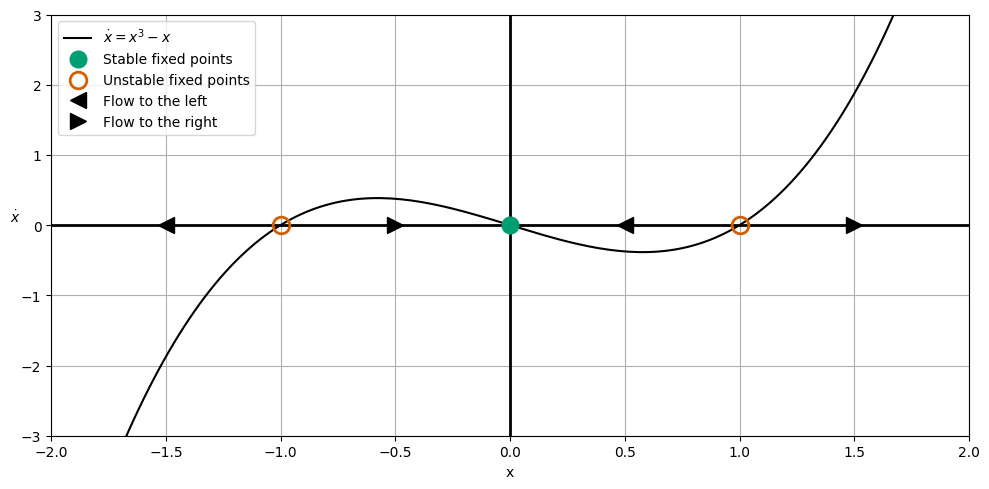

In [55]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

x = np.linspace(-7/2*np.pi, 7/2*np.pi, 1000)
xdot = x**3-x

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, xdot, 'k', label=r'$\dot{x} = x^3 - x$')

ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

plt.plot([0], [0], 
         'C1o', 
         markersize=12,
         label='Stable fixed points')

plt.plot([-1, 1], [0,  0], 
         'C2o', 
         markersize=12, 
         markerfacecolor='none',
         markeredgewidth=2,
         markeredgecolor='C2',
         label='Unstable fixed points')

plt.plot([-1.5, 0.5], [0, 0], 
         'k<', 
         markersize=12,
         label='Flow to the left')
plt.plot([-0.5, 1.5], [0, 0], 
         'k>', 
         markersize=12,
         label='Flow to the right')

plt.legend(loc='upper left')
plt.xlim(-2, 2)
plt.ylim(-3, 3)
ax.set_xlabel(r'x')
ax.set_ylabel(r'$\dot{x}$', rotation=0)
ax.grid()

plt.tight_layout()

### What does the motion look like?

From the phase potrait, we can see that for $|x_0| > 1$, the solutions run off to $|x| \rightarrow |\pm \infty|$. Otherwise all solutions will approach the stable critical point at $x = 0$. 

Notice we did all this analysis without trying to solve the differential equation. We can understand the general behavior of the system by looking at the phase portrait. If we did try to solve it, we would find that the solutions are not easy to find in a closed form.

$$\dot{x} = x^3 - x,$$

$$\int \frac{dx}{x^3 - x} = \int dt,$$

$$\int_{x_0}^{x(f)} \frac{dx}{x^3 - x} = t - 0.$$

$$t = \dfrac{1}{2}\ln(1-x^2)|_{x_0}^{x(f)} -\ln(x)|_{x_0}^{x(f)},$$

$$t= \dfrac{1}{2}\ln\left(\dfrac{1-x(f)^2}{1-x_0^2}\right) - \ln\left(\dfrac{x(f)}{x_0}\right).$$

Again. OOF. That's a lot of work for a simple system.

### Summary

We still need some tools to deal with finding trajectories for systems that are not easy to solve. But let's pause for a minute and appreciate what we have done. Without solving the differential equation, we have could characterize all possible solutions.

Now, the next step is to do this with 2nd order differential equations. The analogy changes from a 'Flow on a line' to a 'Flow on a plane'. Let's introduce that with a simple example.


## The Harmonic Oscillator Gets a Bad Rap

We've shown that the harmonic oscillator is a simple system to solve. But let's consider the following 2nd order differential equation where the force is not linear. This is the classical pendulum equation of motion where we have removed the small angle approximation and dispensed with the parameters that control the motion ($\omega^2=1$).

$$\ddot{x} = -\sin x.$$

We will model this system in phase space, but let us first take the linear approximation of the system. We can do this by expanding the $\sin x$ term in a Taylor series:

$$\sin x \approx x - \dfrac{x^3}{3!} + \dfrac{x^5}{5!} - \dfrac{x^7}{7!} + \ldots.$$

If we keep only the first term, we get the linear harmonic oscillator:

$$\ddot{x} = -x.$$

Now, we transform the 2nd order differential equation into two 1st order differential equations:

$$\dot{x} = v,$$
$$\dot{v} = -x.$$

This gives us a description of the motion in phase space. We can plot the phase portrait of this system by considering that every point in phase space $\langle x, v\rangle$ has an arrow that is represented by the change that occurs at that location $\langle \dot{x}, \dot{v} \rangle = \langle v, -x\rangle$. This is a *strange* concept, but the logic is that how $x$ and $v$ change at a given point in phase space is given by the velocity vector at that point and it depends on the location that you are at in phase space. Let's plot this in parts below.

### The $x=0$ line

Let's first consider the vertical axis $x=0$. Note that we can directly compute this:

$$\langle \dot{x}, \dot{v} \rangle = \langle v,0 \rangle.$$

So in the phase space, the arrows will be completely horizontal and will get larger as you move away from the origin.

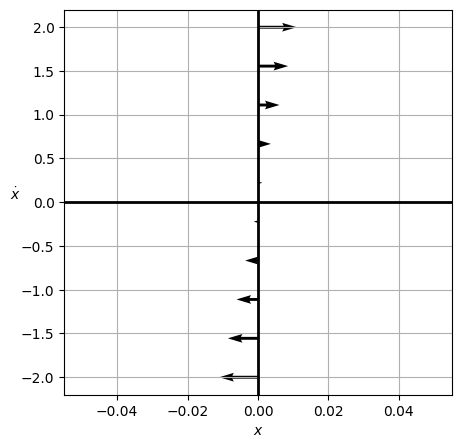

In [65]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def returnPhase(x, xdot):
    return (xdot, -x)

# Points along the vertical axis
v = np.linspace(-2, 2, 10)
x = np.zeros_like(v)

# Xompute the phase portrait
xdot, ydot = returnPhase(x, v)

# Plot the phase portrait as arrows
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(x, v, xdot, ydot)
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\dot{x}$', rotation=0)
ax.grid()


### The $v=0$ line

Similarly, we can compute the arrows on the horizontal axis $v=0$:

$$\langle \dot{x}, \dot{v} \rangle = \langle 0,-x \rangle.$$

So these will be completely vertical and will get larger as you move away from the origin. The negative sign indicates that the arrows will point up on the left side and down on the right side. Let's plot that.

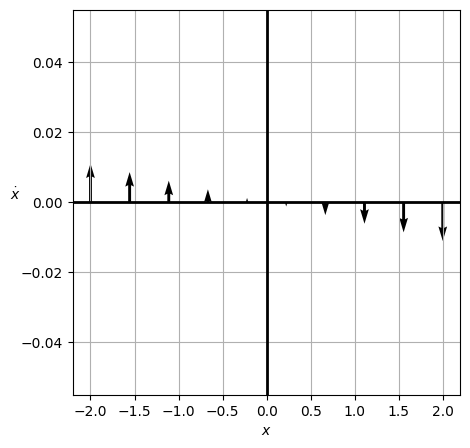

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def returnPhase(x, xdot):
    return (xdot, -x)

# Points along the horizontal axis
x = np.linspace(-2, 2, 10)
v = np.zeros_like(x)

# Xompute the phase portrait
xdot, ydot = returnPhase(x, v)

# Plot the phase portrait as arrows
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(x, v, xdot, ydot)
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\dot{x}$', rotation=0)
ax.grid()


### Putting it all together

We could keep plotting like this and we will begin to connect the dots into a phase potrait. We have already built the code to do this in general above, but we need to make use of the 'meshgrid' function in numpy to make this work. [Meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) is a function that generates a grid of points in 2D space. We can use it to take our 2 arrays for the space we are interested in and generate a grid of points that we can use to compute the arrows at each point. Let's plot the full phase portrait of the system below.

We also introduce the [streamplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html) function in matplotlib. This function connects the lines a little more smoothly and gives a better representation of the flow of the system.

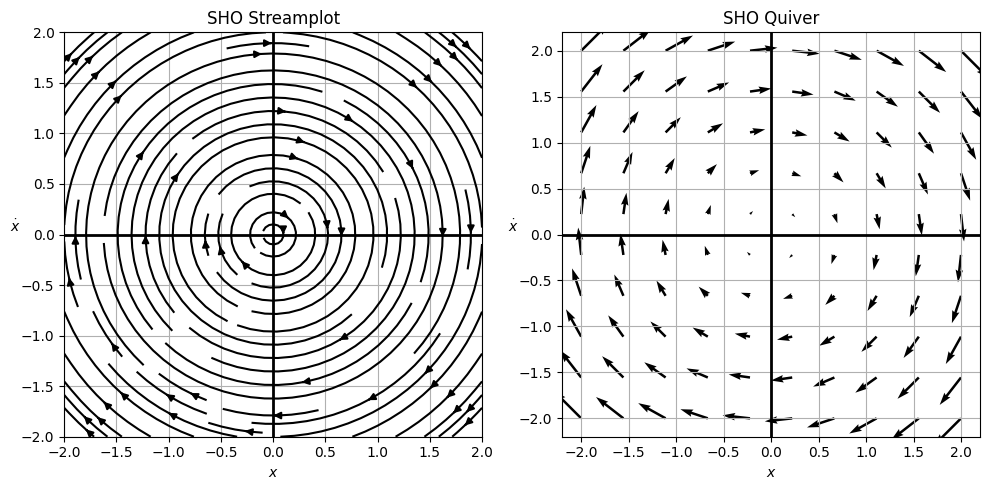

In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def returnPhase(x, xdot):
    return (xdot, -x)

# Points along the horizontal axis
x = np.linspace(-2, 2, 10)
v = x

# Use meshgrid to create a grid
X, V = np.meshgrid(x, v)

# Compute the phase portrait
# NOTE WE ARE NOW USING X, V
xdot, ydot = returnPhase(X, V)

# Plot the phase portrait as arrows and using a streamplot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.streamplot(X, V, xdot, ydot, color='k')
ax1.title.set_text('SHO Streamplot')
ax1.axhline(0, color='black', linewidth=2)
ax1.axvline(0, color='black', linewidth=2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\dot{x}$', rotation=0)
ax1.grid()

ax2.quiver(X, V, xdot, ydot)
ax2.title.set_text('SHO Quiver')
ax2.axhline(0, color='black', linewidth=2)
ax2.axvline(0, color='black', linewidth=2)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\dot{x}$', rotation=0)
ax2.grid()

plt.tight_layout()


### What does the motion look like?

Well, it's the simple harmonic oscillator. The motion is periodic and sinusoidal. It's bounded in ellipses of increasing energy as you go outwards. The critical points are at the origin, where the system is at rest, but no trajectory will ever reach the origin except for the one that starts there. The system will oscillate back and forth forever. Total energy for any trajectory is conserved (that's why the ellipses are concentric). Each loop characterizes a full period of the motion for a given set of initial conditions. All initial conditions will lead to periodic motion, and all can be characterized by the phase portrait.

#### How do we know the phase trajectories are ellipses?

The energy of the system is given by:

$$E = \dfrac{1}{2}mv^2 + \dfrac{1}{2}kx^2.$$

For any one trajectory, the energy is conserved. So we can write:

$$E = \dfrac{1}{2}mv^2 + \dfrac{1}{2}kx^2 = \text{constant}.$$

This is the equation of an ellipse. We can rewrite it as:

$$1 = \dfrac{v^2}{2E/m} + \dfrac{x^2}{2E/k}.$$

This ellipse is centered at the origin and has a semi-major axis of $\sqrt{2E/k}$ and a semi-minor axis of $\sqrt{2E/m}$. The energy of the system determines the size of the ellipse. The larger the energy, the larger the ellipse.

### Returning to the Pendulum

In the pendulum problem, we have a second order non linear differential equation, which we can write as two first order equations:

$$\dot{x} = v,$$
$$\dot{v} = -\sin x.$$

We can now use the infrastructure we have built to plot the phase portrait of the pendulum. We will plot the phase portrait of the pendulum below.

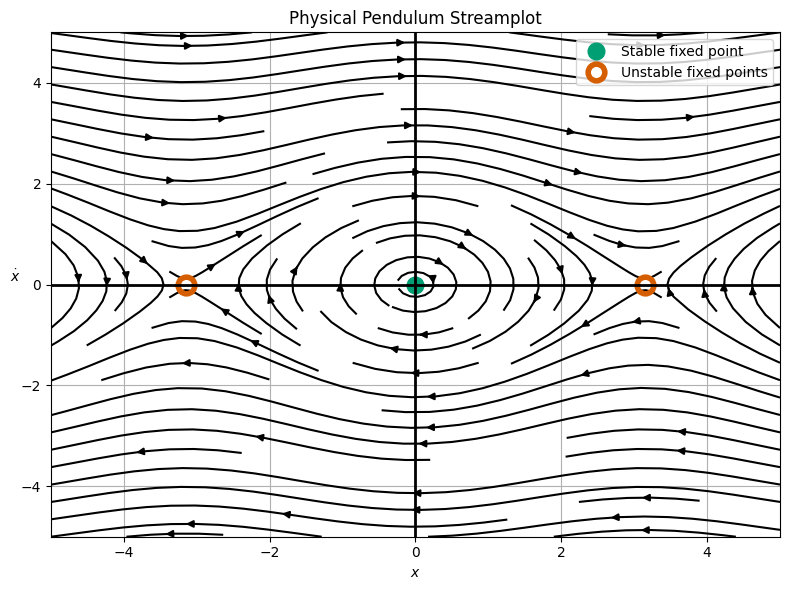

In [94]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def returnPhase(x, xdot):
    return (xdot, -np.sin(x))

# Points along the horizontal axis
x = np.linspace(-5, 5, 20)
v = x

# Use meshgrid to create a grid
X, V = np.meshgrid(x, v)

# Compute the phase portrait
# NOTE WE ARE NOW USING X, V
xdot, ydot = returnPhase(X, V)

# Plot the phase portrait as arrows and using a streamplot

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

ax1.streamplot(X, V, xdot, ydot, color='k')
ax1.plot([0], [0], 'C1o', 
         markersize=12, 
         label='Stable fixed point')

ax1.plot([-np.pi, np.pi], [0, 0], 'C2o', 
         markersize=12, 
         markerfacecolor='none',
         markeredgewidth=4,
         label='Unstable fixed points')

ax1.title.set_text('Physical Pendulum Streamplot')
ax1.axhline(0, color='black', linewidth=2)
ax1.axvline(0, color='black', linewidth=2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\dot{x}$', rotation=0)
ax1.grid()
ax1.legend()

plt.tight_layout()

### What does the motion look like?

Now, we see a more complex picture of the pendulum. The motion is still oscillatory and periodic, but it is definitely not sinusoidal. For very small choices of initial conditions, the motion is sinusoidal; we can zoom in an see we get near ellipses.

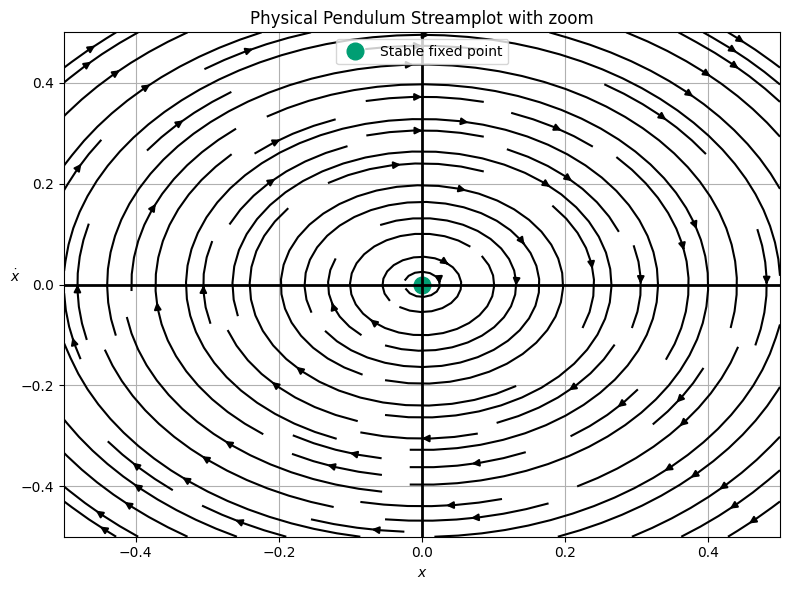

In [93]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def returnPhase(x, xdot):
    return (xdot, -np.sin(x))

# Points along the horizontal axis
x = np.linspace(-0.5, 0.5, 20)
v = x

# Use meshgrid to create a grid
X, V = np.meshgrid(x, v)

# Compute the phase portrait
# NOTE WE ARE NOW USING X, V
xdot, ydot = returnPhase(X, V)

# Plot the phase portrait as arrows and using a streamplot

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

ax1.streamplot(X, V, xdot, ydot, color='k')
ax1.plot([0], [0], 'C1o', 
         markersize=12, 
         label='Stable fixed point')

# ax1.plot([-np.pi, np.pi], [0, 0], 'C2o', 
#          markersize=12, 
#          markerfacecolor='none',
#          markeredgewidth=4,
#          label='Unstable fixed points')

ax1.title.set_text('Physical Pendulum Streamplot with zoom')
ax1.axhline(0, color='black', linewidth=2)
ax1.axvline(0, color='black', linewidth=2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\dot{x}$', rotation=0)
ax1.grid()
ax1.legend()

plt.tight_layout()

So we see that for small initial conditions, we recover the SHO. But for most initial conditions, we have oscillations that are not sinusoidal. Moreover, we have a series of high energy trajectories that are not bounded. These are the ones that continue to allow the pendulum to rotate over the top of itself. This is a new type of motion that we did not see in the SHO.

## What about damped motion?

We can also consider the case where we add a damping term to the pendulum equation of motion:

$$\ddot{x} = -\sin x - \gamma \dot{x}.$$

Or in the approximate form:

$$\ddot{x} = - x - \gamma \dot{x}.$$

In either case, we can write this as two first order equations:

**Exact Form**

$$\dot{x} = v,$$
$$\dot{v} = -\sin x - \gamma v.$$

**Approximate Form**

$$\dot{x} = v,$$
$$\dot{v} = -x - \gamma v.$$

When we plot this phase portrait we will find a new type of motion and a new type of critical point -- an attractor. This is a point in phase space that all trajectories will eventually approach. We leave that plot as an exercise.